In [1]:
import tensorflow.keras as keras

In [2]:
mnist = keras.datasets.mnist
print(mnist)

<module 'tensorflow_core.python.keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\mrtru\\Anaconda3\\envs\\tensorflow_gpu\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

In [5]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


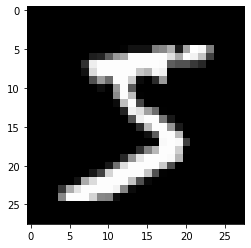

In [6]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [7]:
print(y_train)

[5 0 4 ... 5 6 8]


In [8]:
#after observation, x_train seem to be 28x28x(numberOfTestImage) matrix array, y is one dimention array
#first step 1: 28x28x(numberOfTestImage) -> make 28*28x(numberOfTestImage) 
import numpy as np

x_train_c = np.zeros(shape=(len(y_train),28*28))

for i in range(len(y_train)):
    x_train_c[i] = np.reshape(x_train[i],28*28)

x_train_c = x_train_c / 255

print(x_train[0])
print(x_train_c[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
#now we convivert y from matrix[0,numberOfTestImage] to matrix[numberOfTestImage,0]
print(y_train)
y_train_c = np.array([y_train])
y_train_c = y_train_c.T
print(y_train_c)

[5 0 4 ... 5 6 8]
[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [10]:
#initialize weights randomly with mean 0
syn0 = 2*np.random.random((784,300)) - 1
syn1 = 2*np.random.random((300,1)) - 1

print(syn0)
print(syn1)

[[-0.61553788 -0.39324833  0.06659044 ...  0.91848395  0.9790287
   0.25897078]
 [-0.92626235 -0.27993792 -0.9105832  ... -0.24936702  0.81647588
  -0.95298199]
 [-0.98264809  0.55609295 -0.52916247 ...  0.85444299 -0.55232372
  -0.43731729]
 ...
 [-0.1417345   0.35986507  0.30830345 ... -0.37624318 -0.21600901
  -0.26272014]
 [-0.28983374 -0.55044066  0.36326851 ... -0.74774445 -0.14119307
  -0.98392183]
 [-0.82248853 -0.23046002 -0.37815321 ...  0.57056342 -0.49690146
  -0.94236105]]
[[ 0.61618901]
 [ 0.04146539]
 [-0.75527378]
 [ 0.02694944]
 [ 0.53683387]
 [-0.5992589 ]
 [-0.86896303]
 [ 0.04015589]
 [-0.58332707]
 [ 0.587717  ]
 [-0.76778335]
 [-0.49938346]
 [ 0.67373946]
 [-0.39771925]
 [ 0.47551273]
 [ 0.25465775]
 [ 0.79620383]
 [ 0.61663782]
 [ 0.63739915]
 [-0.13637449]
 [-0.04265312]
 [ 0.09470261]
 [-0.35405136]
 [-0.57632948]
 [-0.57929271]
 [ 0.56694375]
 [ 0.65904269]
 [-0.79583712]
 [ 0.9312194 ]
 [-0.14600751]
 [ 0.58476449]
 [ 0.29889912]
 [ 0.05045695]
 [ 0.3253705 ]

In [11]:
#sigmoid function
def nonlin(x, deriv=False):
    if(deriv==True):
        return np.where(x > 0, 1, 0)
    return np.where(x > 0, x, 0)

In [12]:
print(len(y_train))

60000


In [13]:
#now train the dataset for 10000 time

x_train_r= np.split(x_train_c, 1000)
y_train_r_temp= np.split(y_train, 1000)

y_train_r = np.reshape(y_train_r_temp[0], (len(y_train_r_temp[0]), 1))

print(y_train_r)
for iter in range(1000):
    
    #forward propagation
    l0 = x_train_r[0]
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    
    #how much did we miss
    l2_error = y_train_r - l2

    if(iter%10 == 0):
        print("error : {0}".format(str(np.mean(np.abs(l2_error)))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2, deriv = True)
    
    #how much did each l1 value contribute to the l2 error (according to the weight)
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1 ?
    # were we really sure ? if so, dont change too much
    l1_delta = l1_error * nonlin(l1, deriv = True)
    

    #update weights
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta) 

[[5]
 [0]
 [4]
 [1]
 [9]
 [2]
 [1]
 [3]
 [1]
 [4]
 [3]
 [5]
 [3]
 [6]
 [1]
 [7]
 [2]
 [8]
 [6]
 [9]
 [4]
 [0]
 [9]
 [1]
 [1]
 [2]
 [4]
 [3]
 [2]
 [7]
 [3]
 [8]
 [6]
 [9]
 [0]
 [5]
 [6]
 [0]
 [7]
 [6]
 [1]
 [8]
 [7]
 [9]
 [3]
 [9]
 [8]
 [5]
 [9]
 [3]
 [3]
 [0]
 [7]
 [4]
 [9]
 [8]
 [0]
 [9]
 [4]
 [1]]
error : 5.349513814300982
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
error : 4.5
e